# 소방청 구조 활동 현황 분석

이 데이터셋은 소방청 구조 활동 현황에 대한 것으로, 사건이 발생한 날짜와 시간, 위치, 사고 원인 및 사고 종별과 같은 정보를 담고 있음

* 주요컬럼

    * 신고년월일: 신고가 접수된 날짜
    * 신고시각: 신고가 접수된 시각
    * 출동년월일: 출동한 날짜
    * 출동시각: 출동한 시각
    * 발생장소_시/구/동: 사건 발생 장소의 시, 구, 동
    * 사고원인: 사고의 원인
    * 사고원인코드명_사고종별: 사고의 구체적인 분류

* 활용 라이브러리 : pandas, Seaborn

In [91]:
!pip install pandas

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (윈도우 환경)
plt.rc('font', family='Malgun Gothic')

# plt.rc('font', family='AppleGothic') #mac


In [93]:
df = pd.read_csv('소방청_구조활동현황_20231231.csv')

In [94]:
df.head()

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별
0,1,2023-01-01,0:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량
1,2,2023-01-01,0:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량
2,3,2023-01-01,0:01,2023-01-01,0:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문
3,4,2023-01-01,0:03,2023-01-01,0:04,서울특별시,중구,충무로2가,화재,건축·구조물
4,5,2023-01-01,0:04,2023-01-01,0:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비


In [95]:
df.tail()

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별
651132,651133,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인
651133,651134,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인
651134,651135,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사
651135,651136,2023-12-31,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)"
651136,651137,2023-12-31,23:59,2024-01-01,0:00,강원특별자치도,정선군,정선읍,비화재보 확인,자동화재속보설비


### 데이터타입 변경
* 신고년월일과 출동년월일 컬럼은: 날짜데이터
* 신고시각과 출동시작 컬럼은: 시간데이터

In [96]:
#원하는 데이터 선택 
df['신고년월일'].head()

0    2023-01-01
1    2023-01-01
2    2023-01-01
3    2023-01-01
4    2023-01-01
Name: 신고년월일, dtype: object

In [97]:
df['출동시각'].head()

0    0:01
1    0:01
2    0:03
3    0:04
4    0:05
Name: 출동시각, dtype: object

In [98]:
#데이터 타입 변경
df['신고년월일'] = pd.to_datetime(df['신고년월일'])


In [99]:
df['신고년월일'].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: 신고년월일, dtype: datetime64[ns]

In [100]:
df.info() #전체 컬럼타입 변경사항 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  datetime64[ns]
 2   신고시각          651137 non-null  object        
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 49.7+ MB


In [101]:
#데이터 타입 변경
df['신고시각'] = pd.to_datetime(df['신고시각'], format='%H:%M') #시간분으로 변경


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  datetime64[ns]
 2   신고시각          651137 non-null  datetime64[ns]
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 49.7+ MB


### 문자열 데이터로 다시 변경
* 두 데이터를 병합

In [103]:
df['신고년월일'] = df['신고년월일'].astype(str)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  object        
 2   신고시각          651137 non-null  datetime64[ns]
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 49.7+ MB


In [105]:
# '신고시각' 열에서 시간(%H)과 분(%M)을 추출하여 'HH:MM' 형식의 문자열로 변환
df['신고시각'] = df['신고시각'].dt.strftime('%H:%M')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   번호            651137 non-null  int64 
 1   신고년월일         651137 non-null  object
 2   신고시각          651137 non-null  object
 3   출동년월일         651137 non-null  object
 4   출동시각          651137 non-null  object
 5   발생장소_시        651105 non-null  object
 6   발생장소_구        651105 non-null  object
 7   발생장소_동        647090 non-null  object
 8   사고원인          651137 non-null  object
 9   사고원인코드명_사고종별  651137 non-null  object
dtypes: int64(1), object(9)
memory usage: 49.7+ MB


In [107]:
df.head()

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별
0,1,2023-01-01,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량
1,2,2023-01-01,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량
2,3,2023-01-01,00:01,2023-01-01,0:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문
3,4,2023-01-01,00:03,2023-01-01,0:04,서울특별시,중구,충무로2가,화재,건축·구조물
4,5,2023-01-01,00:04,2023-01-01,0:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비


In [108]:
#병합 후 새 컬럼 추가 (공백도 포함)
df['신고일시'] = df['신고년월일'] + ' ' + df['신고시각']

In [109]:
df

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시
0,1,2023-01-01,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00
1,2,2023-01-01,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00
2,3,2023-01-01,00:01,2023-01-01,0:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01
3,4,2023-01-01,00:03,2023-01-01,0:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03
4,5,2023-01-01,00:04,2023-01-01,0:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04
...,...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55
651133,651134,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55
651134,651135,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55
651135,651136,2023-12-31,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   번호            651137 non-null  int64 
 1   신고년월일         651137 non-null  object
 2   신고시각          651137 non-null  object
 3   출동년월일         651137 non-null  object
 4   출동시각          651137 non-null  object
 5   발생장소_시        651105 non-null  object
 6   발생장소_구        651105 non-null  object
 7   발생장소_동        647090 non-null  object
 8   사고원인          651137 non-null  object
 9   사고원인코드명_사고종별  651137 non-null  object
 10  신고일시          651137 non-null  object
dtypes: int64(1), object(10)
memory usage: 54.6+ MB


In [111]:
#데이터 타임으로 변경
df['신고일시'] = pd.to_datetime(df['신고일시'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  object        
 2   신고시각          651137 non-null  object        
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
 10  신고일시          651137 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 54.6+ MB


In [113]:
#병합 후 새로운 컬럼 생성

df['출동일시'] = df['출동년월일'] + " " + df['출동시각']
df['출동일시']  = pd.to_datetime(df['출동일시'])


In [114]:
df

,번호,신고년월일,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,2023-01-01,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,2023-01-01,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,2023-01-01,00:01,2023-01-01,0:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,2023-01-01,00:03,2023-01-01,0:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,2023-01-01,00:04,2023-01-01,0:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,2023-12-31,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,2023-12-31,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   신고년월일         651137 non-null  object        
 2   신고시각          651137 non-null  object        
 3   출동년월일         651137 non-null  object        
 4   출동시각          651137 non-null  object        
 5   발생장소_시        651105 non-null  object        
 6   발생장소_구        651105 non-null  object        
 7   발생장소_동        647090 non-null  object        
 8   사고원인          651137 non-null  object        
 9   사고원인코드명_사고종별  651137 non-null  object        
 10  신고일시          651137 non-null  datetime64[ns]
 11  출동일시          651137 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 59.6+ MB


### 필요없는 컬럼 삭제

In [116]:
#컬럼 삭제(drop: 삭제 / axis : 축(1-컬럼, 2-로우))
df_new = df.drop(['신고년월일'], axis= 1) #원본에서 삭제 x
df_new

,번호,신고시각,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,00:00,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,00:01,2023-01-01,0:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,00:03,2023-01-01,0:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,00:04,2023-01-01,0:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...
651132,651133,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,23:55,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,23:57,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [117]:
#사용데이터 변경 > df_new
df_new.drop(['신고시각'], axis= 1, inplace=True) #데이터프레임에 바로 적용(False: 따로 적용)
df_new

,번호,출동년월일,출동시각,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,2023-01-01,0:01,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,2023-01-01,0:03,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,2023-01-01,0:04,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,2023-01-01,0:05,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...,...,...
651132,651133,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,2023-12-31,23:55,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,2023-12-31,23:55,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,2023-12-31,23:57,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [118]:
df_new.drop(['출동년월일'], axis= 1, inplace=True)
df_new.drop(['출동시각'], axis= 1, inplace=True)
df_new.head(3)

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00


In [119]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651137 entries, 0 to 651136
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   번호            651137 non-null  int64         
 1   발생장소_시        651105 non-null  object        
 2   발생장소_구        651105 non-null  object        
 3   발생장소_동        647090 non-null  object        
 4   사고원인          651137 non-null  object        
 5   사고원인코드명_사고종별  651137 non-null  object        
 6   신고일시          651137 non-null  datetime64[ns]
 7   출동일시          651137 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 39.7+ MB


### 결측치(NULL) 확인

* 발생장소_시: 32개의 결측값
* 발생장소_구: 32개의 결측값
* 발생장소_동: 4047개의 결측값

    * 결측치 처리법 : 다른 값으로 대체, 삭제

In [120]:
df_new.isnull().sum()

번호                 0
발생장소_시            32
발생장소_구            32
발생장소_동          4047
사고원인               0
사고원인코드명_사고종별       0
신고일시               0
출동일시               0
dtype: int64

## 데이터 전처리

* 삭제나 지역명을 쓰기에는 불특정한 정보이므로 미확인으로 대체함.

In [121]:
# '발생장소_시', '발생장소_구', '발생장소_동'의 결측값을 '미확인'으로 대체하고 결과를 새로운 변수에 저장

df_new['발생장소_시'].fillna('미확인', inplace=True)
df_new['발생장소_구'].fillna('미확인', inplace=True)
df_new['발생장소_동'].fillna('미확인', inplace=True)

C:\Users\jjk\AppData\Local\Temp\ipykernel_33616\1962476937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['발생장소_시'].fillna('미확인', inplace=True)
C:\Users\jjk\AppData\Local\Temp\ipykernel_33616\1962476937.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [122]:
df_new.isnull().sum() 

번호              0
발생장소_시          0
발생장소_구          0
발생장소_동          0
사고원인            0
사고원인코드명_사고종별    0
신고일시            0
출동일시            0
dtype: int64

In [123]:
# 특정 컬럼에서 '미확인' 값이 있는 행을 필터링하여 확인
filtered_data = df_new[df_new['발생장소_시'] == '미확인']
print(filtered_data)

            번호 발생장소_시 발생장소_구 발생장소_동           사고원인 사고원인코드명_사고종별  \
1369      1370    미확인    미확인    미확인  장애물 제거 및 안전조치      간판 안전조치   
2287      2288    미확인    미확인    미확인        비화재보 확인         타는연기   
100792  100793    미확인    미확인    미확인           위치확인   신변확인(현장확인)   
116699  116700    미확인    미확인    미확인             화재         화재확인   
234146  234147    미확인    미확인    미확인        비화재보 확인       비상방송설비   
282248  282249    미확인    미확인    미확인         벌(집)제거           말벌   
312896  312897    미확인    미확인    미확인        비화재보 확인         타는연기   
346846  346847    미확인    미확인    미확인         벌(집)제거           말벌   
369806  369807    미확인    미확인    미확인        비화재보 확인           기타   
409559  409560    미확인    미확인    미확인         벌(집)제거           말벌   
410569  410570    미확인    미확인    미확인        비화재보 확인       비상경보설비   
410859  410860    미확인    미확인    미확인         벌(집)제거           말벌   
411939  411940    미확인    미확인    미확인         벌(집)제거      기타 벌집제거   
412022  412023    미확인    미확인    미확인         벌(집)제거           말

In [124]:
# 특정 컬럼에서 '미확인' 값이 있는 행을 필터링하여 확인
filtered_data = df_new[df_new['발생장소_구'] == '미확인']
print(filtered_data)

            번호 발생장소_시 발생장소_구 발생장소_동           사고원인 사고원인코드명_사고종별  \
1369      1370    미확인    미확인    미확인  장애물 제거 및 안전조치      간판 안전조치   
2287      2288    미확인    미확인    미확인        비화재보 확인         타는연기   
100792  100793    미확인    미확인    미확인           위치확인   신변확인(현장확인)   
116699  116700    미확인    미확인    미확인             화재         화재확인   
234146  234147    미확인    미확인    미확인        비화재보 확인       비상방송설비   
282248  282249    미확인    미확인    미확인         벌(집)제거           말벌   
312896  312897    미확인    미확인    미확인        비화재보 확인         타는연기   
346846  346847    미확인    미확인    미확인         벌(집)제거           말벌   
369806  369807    미확인    미확인    미확인        비화재보 확인           기타   
409559  409560    미확인    미확인    미확인         벌(집)제거           말벌   
410569  410570    미확인    미확인    미확인        비화재보 확인       비상경보설비   
410859  410860    미확인    미확인    미확인         벌(집)제거           말벌   
411939  411940    미확인    미확인    미확인         벌(집)제거      기타 벌집제거   
412022  412023    미확인    미확인    미확인         벌(집)제거           말

In [125]:
# 특정 컬럼에서 '미확인' 값이 있는 행을 필터링하여 확인
filtered_data = df_new[df_new['발생장소_동'] == '미확인']
print(filtered_data)

            번호 발생장소_시   발생장소_구 발생장소_동     사고원인        사고원인코드명_사고종별  \
111        112    경기도      광주시    미확인  비화재보 확인                타는냄새   
275        276   경상남도  창원시 성산구    미확인       교통  차량(버스, 화물, 승용, 승합)   
450        451    경기도      광주시    미확인       화재                기타화재   
451        452    경기도      광주시    미확인  비화재보 확인              쓰레기 소각   
734        735    경기도      평택시    미확인   잠금장치개방                출입문    
...        ...    ...      ...    ...      ...                 ...   
650804  650805  부산광역시      기장군    미확인     자살추정             기타 자살추정   
650986  650987    경기도      평택시    미확인       화재              건축·구조물   
650987  650988    경기도      평택시    미확인       화재              건축·구조물   
650988  650989    경기도      평택시    미확인       화재              건축·구조물   
650989  650990    경기도      평택시    미확인       화재              건축·구조물   

                      신고일시                출동일시  
111    2023-01-01 02:22:00 2023-01-01 02:23:00  
275    2023-01-01 06:33:00 2023-01-01 06:34:00  
450    2023-

In [126]:
df_new[df_new['번호'] == 112] #특정번호로 확인 

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
111,112,경기도,광주시,미확인,비화재보 확인,타는냄새,2023-01-01 02:22:00,2023-01-01 02:23:00


In [127]:
df_new['발생장소_구'].value_counts()

발생장소_구
서구         12921
화성시        12415
평택시        11809
북구         10216
중구          9674
           ...  
울산광역시          3
전북특별자치도        2
광주광역시          2
대전광역시          1
제주특별자치도        1
Name: count, Length: 243, dtype: int64

*하단의 결과들처럼, 어딘지 모를 곳에서 화재가 났다는것을 확인가능함. 이럴 경우 데이터를 삭제하는 것이 좋을 것 같음.

In [128]:
df_new[df_new['발생장소_구']== '울산광역시']

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
481358,481359,울산광역시,울산광역시,울산광역시,벌(집)제거,말벌,2023-09-12 16:29:00,2023-09-12 16:15:00
622028,622029,울산광역시,울산광역시,울산광역시,위치확인,신변확인(현장확인),2023-12-11 09:05:00,2023-12-11 09:10:00
636895,636896,울산광역시,울산광역시,울산광역시,위치확인,신변확인(현장확인),2023-12-22 10:02:00,2023-12-22 10:04:00


In [129]:
df_new[df_new['발생장소_구']== '전북특별자치도'] 

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
373118,373119,전북특별자치도,전북특별자치도,전북특별자치도,교통,기타 교통,2023-08-07 14:39:00,2023-08-07 14:42:00
383415,383416,전북특별자치도,전북특별자치도,전북특별자치도,장애물 제거 및 안전조치,나무(가로수) 안전조치,2023-08-10 11:45:00,2023-08-10 11:45:00


In [130]:
df_new[df_new['발생장소_구']=="제주특별자치도"]

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
356303,356304,제주특별자치도,제주특별자치도,제주특별자치도,생활끼임 안전조치,반지,2023-08-02 18:46:00,2023-08-02 18:46:00


In [131]:
df_new[df_new['발생장소_구']=="광주광역시"]

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
185243,185244,광주광역시,광주광역시,광주광역시,잠금장치개방,기타 잠금장치 개방,2023-05-15 10:43:00,2023-05-15 10:43:00
416438,416439,광주광역시,광주광역시,광주광역시,생활끼임 안전조치,반지,2023-08-20 16:01:00,2023-08-20 16:02:00


In [132]:
df_new[df_new['발생장소_구']=="대전광역시"]

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
336816,336817,대전광역시,대전광역시,대전광역시,벌(집)제거,기타 벌집제거,2023-07-28 09:21:00,2023-07-28 09:25:00


### 데이터삭제

In [133]:
to_drop = df_new[(df_new['발생장소_구'] == "울산광역시") | (df_new['발생장소_구'] == "전북특별자치도")].index
df_new = df_new.drop(to_drop) #해당 인덱스의 행을 삭제한 결과를 저장


In [134]:
#5개의 데이터 삭제됨
df_new #651132 rows × 8 columns (기존: 651137 rows × 10 columns)

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [135]:
to_drop2 = df_new[(df_new['발생장소_구'] == "광주광역시") | (df_new['발생장소_구'] == "대전광역시")].index
df_new = df_new.drop(to_drop2) #해당 인덱스의 행을 삭제한 결과를 저장


In [136]:
#3개의 행 삭제 
df_new #651129 rows × 8 columns

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


* 주의 : to_drop은 데이터프레임 자체이며, 이를 drop 메서드에 바로 사용하면 오류가 발생할 수 있습니다. drop 메서드는 삭제할 행 또는 열의 인덱스를 필요로 하므로, to_drop의 인덱스를 추출하여 삭제해야 합니다.

In [137]:
#1개의 행
to_drop = df_new[df_new['발생장소_구'] == "제주특별자치도"].index
df_new = df_new.drop(to_drop) #651128 rows × 8 columns


In [138]:
df_new #651129 rows × 8 columns

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


In [139]:
#결과 확인
df_new["발생장소_구"].value_counts

<bound method IndexOpsMixin.value_counts of 0             김포시
1             김포시
2         천안시 동남구
3              중구
4             제주시
           ...   
651132         중구
651133         중구
651134         중구
651135    고양시 덕양구
651136        정선군
Name: 발생장소_구, Length: 651128, dtype: object>

In [140]:
# 발생장소_구 별로 각 열에 대해 결측치가 아닌 값의 수를 그룹화하여 계산
df_new.groupby('발생장소_구').count()


,번호,발생장소_시,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
발생장소_구,,,,,,,
가평군,2856,2856,2856,2856,2856,2856,2856
강남구,8039,8039,8039,8039,8039,8039,8039
강동구,4059,4059,4059,4059,4059,4059,4059
강릉시,4897,4897,4897,4897,4897,4897,4897
강북구,4459,4459,4459,4459,4459,4459,4459
...,...,...,...,...,...,...,...
홍천군,3143,3143,3143,3143,3143,3143,3143
화성시,12415,12415,12415,12415,12415,12415,12415
화순군,1214,1214,1214,1214,1214,1214,1214


In [141]:
# 그룹화
df_new.groupby('발생장소_구')['번호'].count() #'번호' 컬럼만 선택


발생장소_구
가평군     2856
강남구     8039
강동구     4059
강릉시     4897
강북구     4459
       ...  
홍천군     3143
화성시    12415
화순군     1214
화천군     1216
횡성군     2867
Name: 번호, Length: 238, dtype: int64

In [142]:
# 이중 그룹화
double_grouped = df_new.groupby(['발생장소_시','발생장소_구'])['번호'].count()
double_grouped

발생장소_시   발생장소_구 
강원특별자치도  강릉시        4897
         강원특별자치도       8
         고성군        1540
         동해시        2144
         삼척시        2525
                    ... 
충청북도     청주시 서원구    1807
         청주시 청원구    2058
         청주시 흥덕구    2653
         충주시        2690
         충청북도          5
Name: 번호, Length: 262, dtype: int64

In [143]:
#데이터프레임 생성
df_double= pd.DataFrame(double_grouped)
df_double

번호
발생장소_시  발생장소_구       
강원특별자치도 강릉시      4897
        강원특별자치도     8
        고성군      1540
        동해시      2144
        삼척시      2525
...               ...
충청북도    청주시 서원구  1807
        청주시 청원구  2058
        청주시 흥덕구  2653
        충주시      2690
        충청북도        5

[262 rows x 1 columns]

### Index 이해

In [144]:
#index : 각 행을 고유하게 식별, 접근할 때 사용 like 주민등록번호 (0,1,2,3 ....)
df_new

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
0,1,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
1,2,경기도,김포시,월곶면,화재,자동차·철도차량,2023-01-01 00:00:00,2023-01-01 00:01:00
2,3,충청남도,천안시 동남구,신부동,잠금장치개방,출입문,2023-01-01 00:01:00,2023-01-01 00:03:00
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
4,5,제주특별자치도,제주시,이도이동,비화재보 확인,자동화재탐지설비,2023-01-01 00:04:00,2023-01-01 00:05:00
...,...,...,...,...,...,...,...,...
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651134,651135,서울특별시,중구,을지로6가,비화재보 확인,불빛반사,2023-12-31 23:55:00,2023-12-31 23:55:00
651135,651136,경기도,고양시 덕양구,삼송동,교통,"차량(버스, 화물, 승용, 승합)",2023-12-31 23:57:00,2023-12-31 23:57:00


### Index reset

In [145]:
#reset_index : 인덱스를 열로 변환 
df_double_reset = df_double.reset_index()
df_double_reset

,발생장소_시,발생장소_구,번호
0,강원특별자치도,강릉시,4897
1,강원특별자치도,강원특별자치도,8
2,강원특별자치도,고성군,1540
3,강원특별자치도,동해시,2144
4,강원특별자치도,삼척시,2525
...,...,...,...
257,충청북도,청주시 서원구,1807
258,충청북도,청주시 청원구,2058
259,충청북도,청주시 흥덕구,2653
260,충청북도,충주시,2690


In [146]:
#Rename(번호 => 사고발생건수)
df_double_reset = df_double_reset.rename(columns={'번호':'사고발생건수'})
df_double_reset 

,발생장소_시,발생장소_구,사고발생건수
0,강원특별자치도,강릉시,4897
1,강원특별자치도,강원특별자치도,8
2,강원특별자치도,고성군,1540
3,강원특별자치도,동해시,2144
4,강원특별자치도,삼척시,2525
...,...,...,...
257,충청북도,청주시 서원구,1807
258,충청북도,청주시 청원구,2058
259,충청북도,청주시 흥덕구,2653
260,충청북도,충주시,2690


### 데이터가공 : 피벗테이블

* 장점 : 피벗테이블의 Name 지정 가능

In [147]:
# pivot table(): 재구성, 테이블 형태의 데이터를 만들어줌(그룹화)
#aggfunc : 이 파라미터는 각 그룹에 대해서 적용할 집계함수를 지정
# 각 그룹의 크기와 건수를 계산하기 위해 사이즈를 사용
df_double_pivot = df_new.pivot_table(index=['발생장소_시','발생장소_구'], aggfunc = 'size').reset_index(name = '사고발생건수')
df_double_pivot

,발생장소_시,발생장소_구,사고발생건수
0,강원특별자치도,강릉시,4897
1,강원특별자치도,강원특별자치도,8
2,강원특별자치도,고성군,1540
3,강원특별자치도,동해시,2144
4,강원특별자치도,삼척시,2525
...,...,...,...
257,충청북도,청주시 서원구,1807
258,충청북도,청주시 청원구,2058
259,충청북도,청주시 흥덕구,2653
260,충청북도,충주시,2690


### 데이터 시각화 : Seaborn 

* 대표적인 모듈 - matplotlib(기본), seaborn(심화,간단,직관적,통계적 시각화 특화)

In [148]:
!pip install matplotlib seaborn

<Axes: xlabel='발생장소_시', ylabel='사고발생건수'>

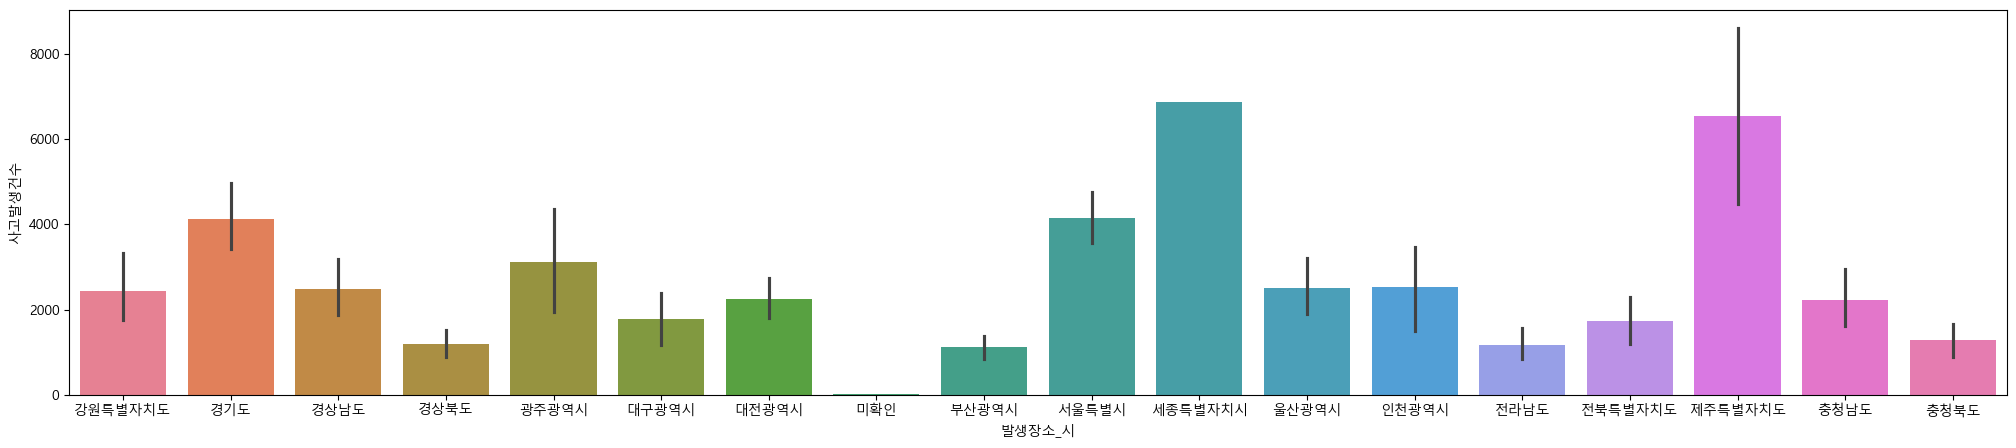

In [149]:
#barplot
plt.figure(figsize=(25,5)) #사이즈 조정

#hue : 범주형 데이터를 색상으로 구분(직관적,이해도 상승)
sns.barplot(data=df_double_pivot, x='발생장소_시', y='사고발생건수', hue='발생장소_시')

* 까만선은 각 카테고리 값의 평균에 대한 95% 신뢰구간을 의미
* 이 구간은 해당 카테고리 값에서 데이터의 흩어짐이나 표본의 크기에 따라서 일반적으로 바뀌지만 막대의 높이에 비해서는 굉장히 작게 나타남
* '발생장소_시' 를 이용해서 도시별로 평균 사고 발생 건수를 추정할 수 있음.
* 이 값을 평균 추정치라고 신뢰할 수 있는 범위는 어디까지인지를 시각화
* 데이터의 유효성과 불확실성 확인

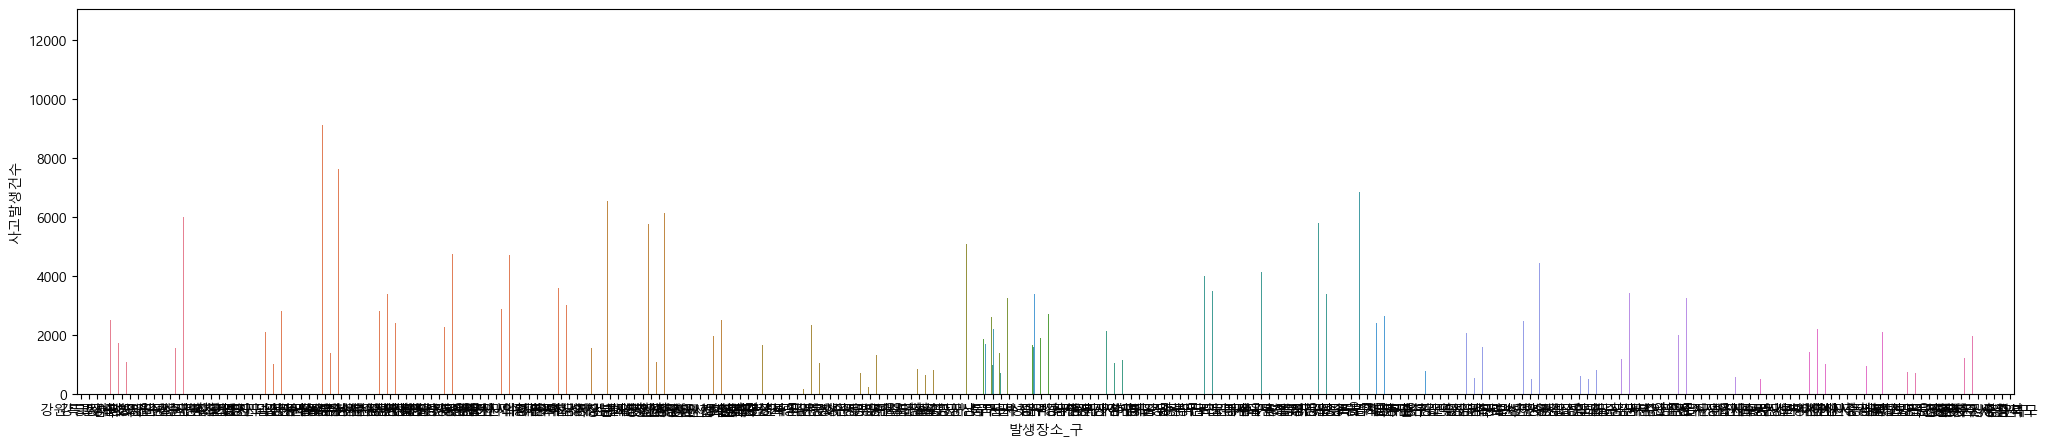

In [150]:
#barplot
plt.figure(figsize=(25,5)) #사이즈 조정

#hue : 범주형 데이터를 색상으로 구분(직관적,이해도 상승)
ax = sns.barplot(data=df_double_pivot, x='발생장소_구', y='사고발생건수', hue='발생장소_시')

#legend(범례) 축소
# ax.legend(fontsize= 'xx-small')

#legend(범례) 삭제
ax.legend_.remove()

In [151]:
df_seoul = df_new[df_new['발생장소_시']=='서울특별시']
df_seoul

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00
...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00


In [152]:
#피벗테이블 적용
df_seoul_pivot = df_seoul.pivot_table(index=['발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
df_seoul_pivot

,발생장소_구,사고발생건수
0,강남구,8039
1,강동구,4059
2,강북구,4459
3,강서구,6132
4,관악구,4412
5,광진구,3291
6,구로구,3992
7,금천구,3490
8,노원구,4242
9,도봉구,3878


In [153]:
#'서울특별시' 데이터 삭제
# df_seoul[df_seoul['발생장소_구']=='서울특별시']
df_seoul= df_seoul[df_seoul['발생장소_구']!=df_seoul['발생장소_시']]
df_seoul

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00
...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00


In [154]:
#피벗테이블 적용
df_seoul_pivot = df_seoul.pivot_table(index=['발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
df_seoul_pivot

,발생장소_구,사고발생건수
0,강남구,8039
1,강동구,4059
2,강북구,4459
3,강서구,6132
4,관악구,4412
5,광진구,3291
6,구로구,3992
7,금천구,3490
8,노원구,4242
9,도봉구,3878


<Axes: xlabel='발생장소_구', ylabel='사고발생건수'>

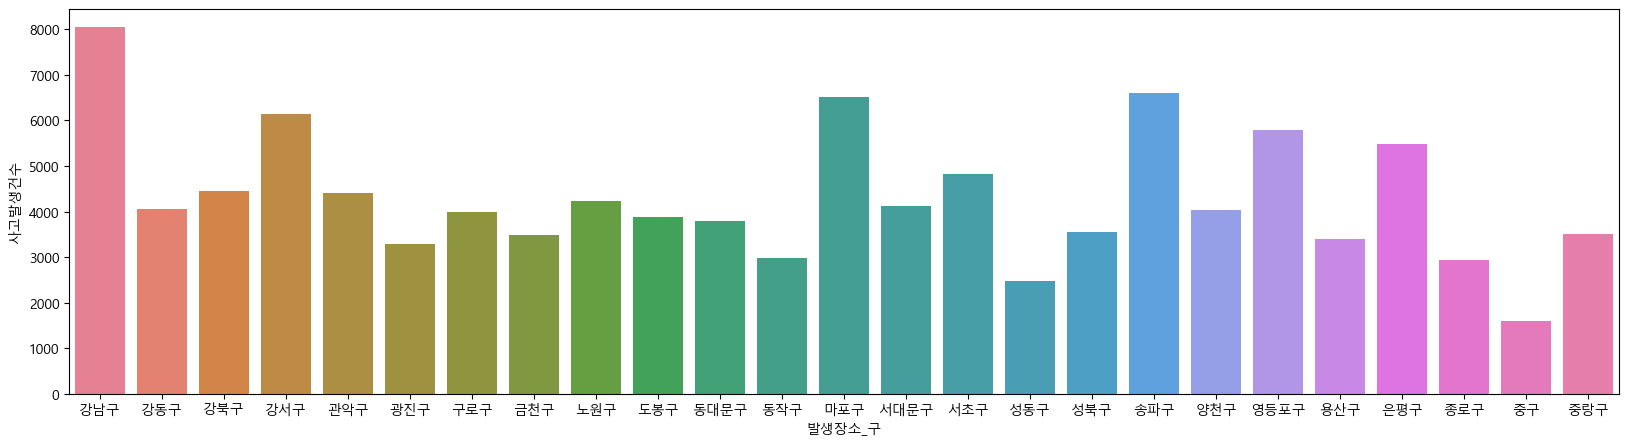

In [155]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_seoul_pivot, x='발생장소_구',y='사고발생건수', hue='발생장소_구')

### 데이터 시각화 : lineplot
* 시간에 따라 확인가능

<Axes: xlabel='발생장소_구', ylabel='사고발생건수'>

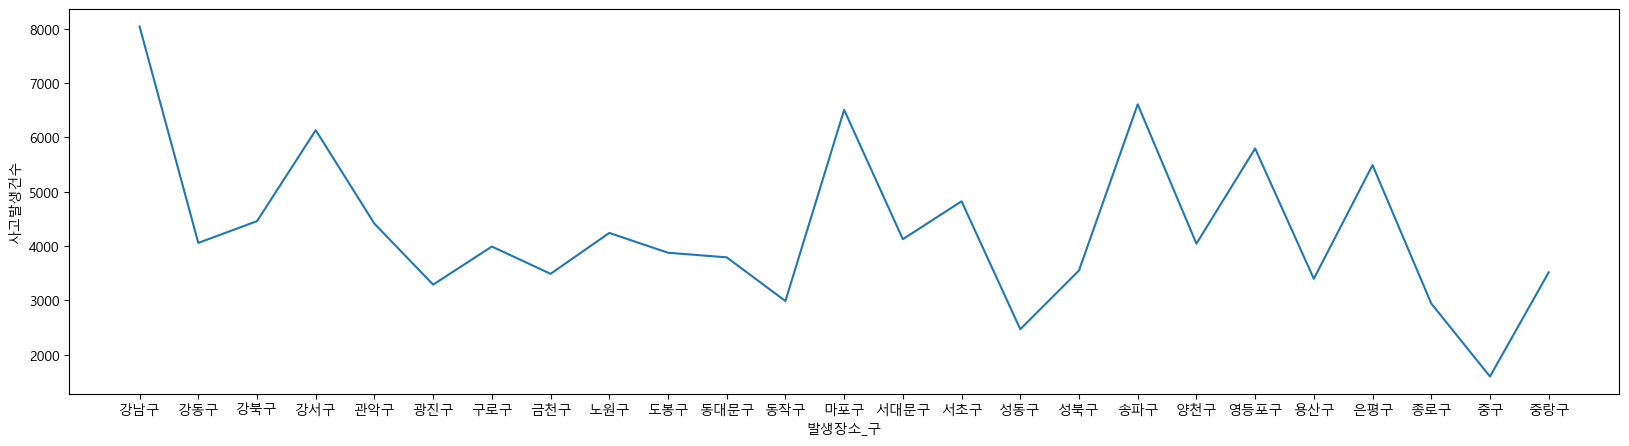

In [156]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_seoul_pivot, x='발생장소_구',y='사고발생건수')

<Axes: xlabel='신고일시', ylabel='사고발생건수'>

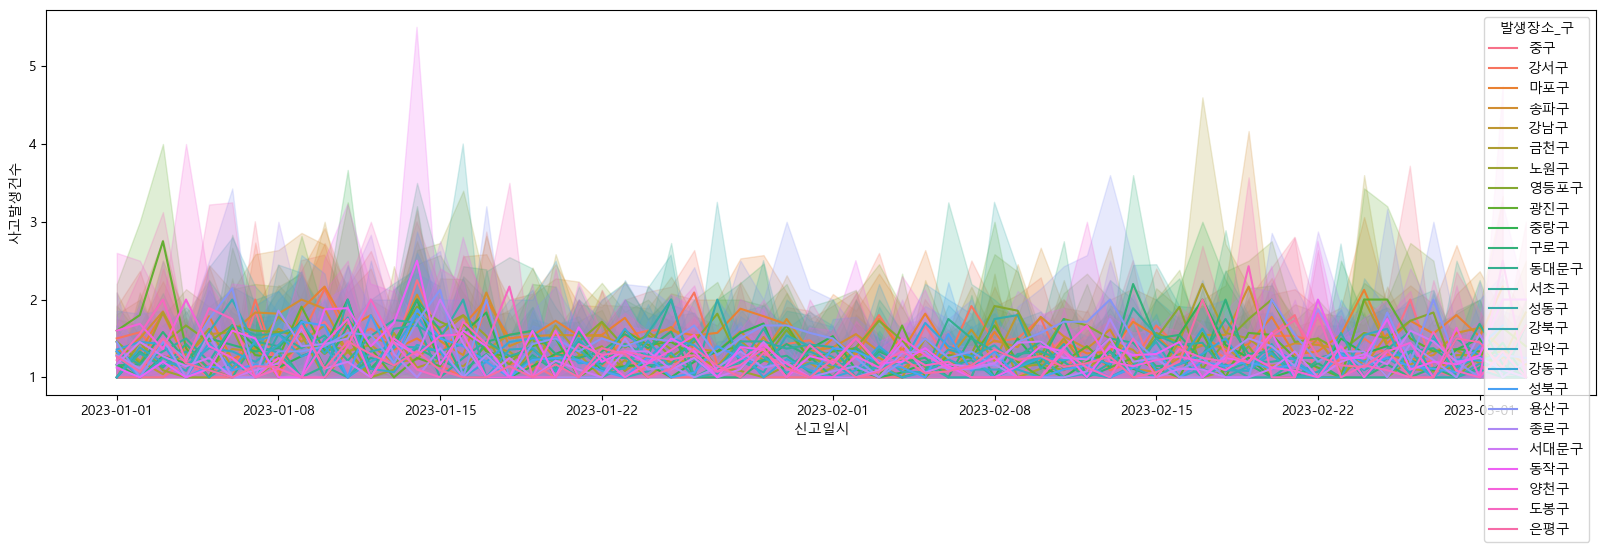

In [157]:
#
df_date_pivot = df_seoul.pivot_table(index=['신고일시','발생장소_구'], aggfunc='size').reset_index(name='사고발생건수')
plt.figure(figsize=(20,5))
sns.lineplot(data=df_date_pivot, x=pd.to_datetime(df_seoul['신고일시']).dt.date, y= '사고발생건수',hue = '발생장소_구')

### 출동소요시간 

In [158]:
# 구별 평균 출동소요시간
df_seoul['출동소요시간'] = df_seoul['출동일시'] - df_seoul['신고일시']
df_seoul


C:\Users\jjk\AppData\Local\Temp\ipykernel_33616\1352297566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간'] = df_seoul['출동일시'] - df_seoul['신고일시']


,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00,0 days 00:01:00
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00,0 days 00:01:00
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00,0 days 00:01:00
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00,0 days 00:02:00
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00


#####
* '출동소요시간' 컬럼의 데이터를 초 단위로 변환하여 새로운 '출동소요시간_초' 컬럼을 생성하는 코드

* '출동소요시간' 컬럼은 datetime 타입의 데이터로, 이 데이터를 초 단위로 변환하기 위해 dt.total_seconds() 메소드를 사용
* dt.total_seconds()는 timedelta 타입의 데이터를 초로 변환해주는 메소드
* 변환된 데이터를 int형으로 변환하여 '출동소요시간_초' 컬럼에 저장
#####

In [159]:
# 출동소요시간을 초 단위로 변환하여 '출동소요시간_초'라는 새로운 열에 저장
df_seoul['출동소요시간_초'] = df_seoul['출동소요시간'].dt.total_seconds().astype(int)
df_seoul

C:\Users\jjk\AppData\Local\Temp\ipykernel_33616\1012008351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간_초'] = df_seoul['출동소요시간'].dt.total_seconds().astype(int)


,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간,출동소요시간_초
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00,0 days 00:01:00,60
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00,0 days 00:01:00,60
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00,0 days 00:01:00,60
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00,0 days 00:02:00,120
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00,0 days 00:01:00,60
...,...,...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00,0
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00,0
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00,0
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00,0


In [160]:
# 출동소요시간을 분 단위로 변환하여 '출동소요시간_분'이라는 새로운 열에 저장
df_seoul['출동소요시간_분'] = df_seoul['출동소요시간'].dt.total_seconds() / 60
df_seoul

C:\Users\jjk\AppData\Local\Temp\ipykernel_33616\710800187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간_분'] = df_seoul['출동소요시간'].dt.total_seconds() / 60


,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간,출동소요시간_초,출동소요시간_분
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00,0 days 00:01:00,60,1.00
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00,0 days 00:01:00,60,1.00
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00,0 days 00:01:00,60,1.00
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00,0 days 00:02:00,120,2.00
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00,0 days 00:01:00,60,1.00
...,...,...,...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00,0,0.00
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00,0,0.00
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00,0,0.00
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00,0,0.00


In [161]:
#df_seoul['출동소요시간_분'].unique().tolist()
df_seoul['출동소요시간_분'] = df_seoul['출동소요시간_분'].astype(int)
df_seoul


C:\Users\jjk\AppData\Local\Temp\ipykernel_33616\6381219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['출동소요시간_분'] = df_seoul['출동소요시간_분'].astype(int)


,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간,출동소요시간_초,출동소요시간_분
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00,0 days 00:01:00,60,1
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00,0 days 00:01:00,60,1
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00,0 days 00:01:00,60,1
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00,0 days 00:02:00,120,2
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00,0 days 00:01:00,60,1
...,...,...,...,...,...,...,...,...,...,...,...
651125,651126,서울특별시,성북구,성북동,화재,건축·구조물,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00,0,0
651126,651127,서울특별시,성북구,성북동,화재,화재확인,2023-12-31 23:48:00,2023-12-31 23:48:00,0 days 00:00:00,0,0
651132,651133,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00,0,0
651133,651134,서울특별시,중구,을지로6가,화재,화재확인,2023-12-31 23:55:00,2023-12-31 23:55:00,0 days 00:00:00,0,0


In [162]:
# describe(): 데이터 프레임의 숫자열에 대해서 통계적인 요약 제공(평균,표준편차,최소값,최대값,4분위수,중앙값 등)
# 문자 계산불가, 데이터 타입이 날짜와 숫자일 떄만 가능 

pd.set_option('display.float_format', '{:.2f}'.format) # 소수점 이하 둘째자리까지만 출력
df_seoul.describe() #df_seoul.describe(include='number') : 숫자제외

,번호,신고일시,출동일시,출동소요시간,출동소요시간_초,출동소요시간_분
count,107656.00,107656,107656,107656,107656.00,107656.00
mean,312859.27,2023-07-04 20:53:37.448168192,2023-07-04 20:55:02.817864448,0 days 00:01:25.369696068,85.37,1.42
min,4.00,2023-01-01 00:03:00,2023-01-01 00:04:00,-24 days +00:04:00,-2073360.00,-34556.00
25%,136022.75,2023-04-11 10:00:00,2023-04-11 10:01:45,0 days 00:01:00,60.00,1.00
50%,286126.50,2023-07-12 00:37:30,2023-07-12 00:39:30,0 days 00:01:00,60.00,1.00
75%,501565.25,2023-09-22 02:37:30,2023-09-22 02:38:30,0 days 00:02:00,120.00,2.00
max,651135.00,2023-12-31 23:55:00,2023-12-31 23:55:00,1 days 00:02:00,86520.00,1442.00
std,199595.78,NaN,NaN,0 days 01:46:57.893017808,6417.89,106.96


* 출동소요시간과 출동소요시간_분 이 마이너스거나 음수인 경우가 발생함
* 신고일시가 출동일시보다 작아야함!
* 즉, 하단 데이터들을 보면 신고시간 보다 출동을 더 빨리한 경우로 오류가 있음

In [163]:
"""
신고일시가 출동일시보다 큰 그 이후 값 출력(오류확인)
#sort values: 정렬 , ascending : 오름차순(T)/내림차순(F)
"""
#출동소요시간을 기준으로 오름차순(작은 값부터 큰 값 순서로) 정렬하여 출력
df_seoul[df_seoul['신고일시']>df_seoul['출동일시']].sort_values(['출동소요시간'], ascending=True)

,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간,출동소요시간_초,출동소요시간_분
119774,119775,서울특별시,광진구,능동,교통,차 대 차,2023-03-31 10:03:00,2023-03-07 10:07:00,-24 days +00:04:00,-2073360,-34556
598555,598556,서울특별시,성북구,석관동,위치확인,신변확인(현장확인),2023-11-22 00:30:00,2023-11-18 14:04:00,-4 days +13:34:00,-296760,-4946
580232,580233,서울특별시,종로구,명륜2가,인명 갇힘,건물,2023-11-08 00:08:00,2023-11-06 01:57:00,-2 days +01:49:00,-166260,-2771
548813,548814,서울특별시,강남구,삼성동,기타 사고,기타,2023-10-18 18:11:00,2023-10-18 11:20:00,-1 days +17:09:00,-24660,-411
600641,600642,서울특별시,성북구,하월곡동,기타 생활안전활동,기타 생활안전활동,2023-11-23 17:49:00,2023-11-23 14:12:00,-1 days +20:23:00,-13020,-217
129757,129758,서울특별시,송파구,방이동,화재,건축·구조물,2023-04-06 12:38:00,2023-04-06 10:00:00,-1 days +21:22:00,-9480,-158
79344,79345,서울특별시,성동구,성수동1가,위치확인,신변확인(현장확인),2023-03-01 10:48:00,2023-03-01 09:20:00,-1 days +22:32:00,-5280,-88
158677,158678,서울특별시,영등포구,여의도동,자살추정,투신,2023-04-27 18:42:00,2023-04-27 17:30:00,-1 days +22:48:00,-4320,-72
530874,530875,서울특별시,은평구,진관동,산악,실족,2023-10-07 15:54:00,2023-10-07 14:54:00,-1 days +23:00:00,-3600,-60
236164,236165,서울특별시,영등포구,영등포동7가,자살추정,자해,2023-06-16 21:58:00,2023-06-16 20:59:00,-1 days +23:01:00,-3540,-59


* 좋은 데이터 분석을 하기 위해서는 이러한 잘못된 데이터들을 잘 처리하는 것도 중요함!
* 해당 데이터를 전부 제외할지, 날짜가 바뀌었다고 판단을 할지, 어떤 날짜를 기준으로 잡을지
* 판단하는 것이 실무에서 60% 이상 소요됨.
* 따라서, 해당 프로젝트에서는 데이터를 삭제하기로 결정.

<Axes: xlabel='발생장소_구', ylabel='출동소요시간_분'>

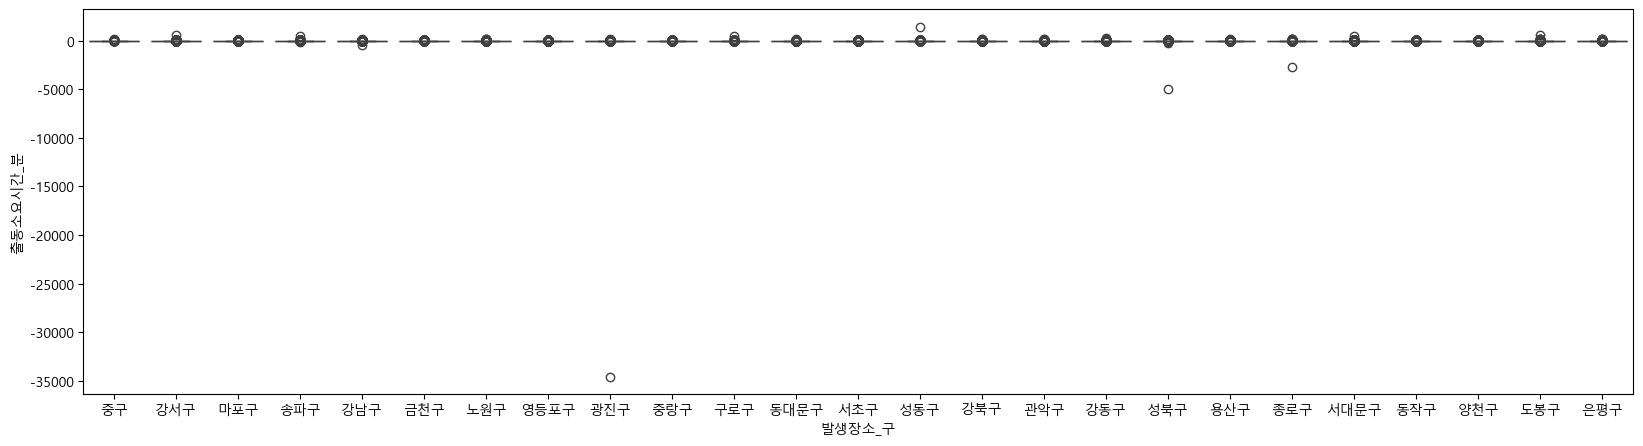

In [164]:
#이상한 데이터들을 그래프로 시각화 : boxplot (데이터 분포, 이상치 시각화 - 4분위수,중앙값,최소값,최대값)
plt.rcParams['axes.unicode_minus'] =False #Y축의 마이너스값 표시
plt.figure(figsize=(20,5))
sns.boxplot(data=df_seoul, x='발생장소_구', y= '출동소요시간_분', hue='발생장소_구')

<Axes: xlabel='발생장소_구', ylabel='출동소요시간_분'>

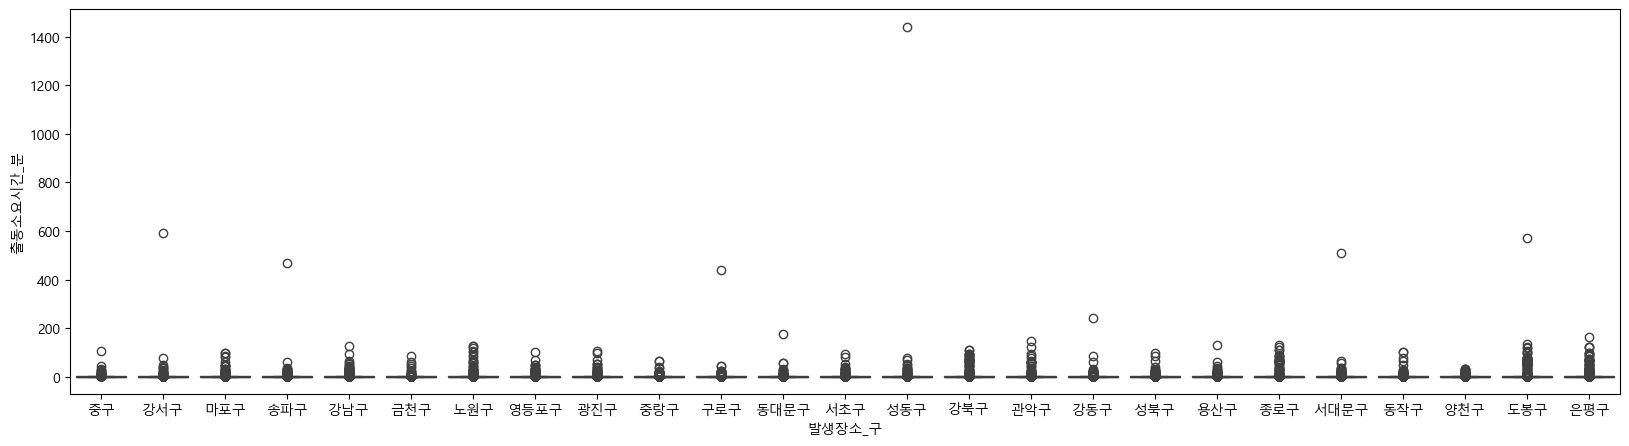

In [165]:
#'신고일시'가 '출동일시'보다 작은 경우만 남겨 마이너스 값을 삭제
df_seoul = df_seoul[df_seoul['신고일시']<df_seoul['출동일시']]

#박스플롯 그리기 
plt.figure(figsize=(20,5)) #가로 20, 세로 5
sns.boxplot(data=df_seoul, x='발생장소_구', y= '출동소요시간_분', hue='발생장소_구')

In [166]:
df_seoul['출동소요시간_분'].describe() #극단적인 값 존재(이상치로 간주)
"""
    데이터 처리방법 : 데이터의 특성이나 분석목적에 따라 달라짐.
    1.데이터의 실제 오류라 제거하거나,
    2. 특이한 값이나 꼭 필요한 흥미로운 패턴이나 중요한 정보를 담고있는 데이터
"""

'\n    데이터 처리방법 : 데이터의 특성이나 분석목적에 따라 달라짐.\n    1.데이터의 실제 오류라 제거하거나,\n    2. 특이한 값이나 꼭 필요한 흥미로운 패턴이나 중요한 정보를 담고있는 데이터\n'

In [167]:
#평균 <- 표준편차 * 3 인 것보다 더 크거나 작으면 이상치로 간주하고 제거 
mean = df_seoul['출동소요시간_분'].mean() #'출동소요시간_분'의 평균계산

In [168]:
std = df_seoul['출동소요시간_분'].std() #'출동소요시간_분'의 표준편차 계산 

In [169]:
thereshold = mean+ 3 *std #기준점 지정: 평균에서 표준편차의 3배 수준 이상이면 이상치로 판단 

In [170]:
#출동 소요 시간이 thereshold 이하인 
#행들만 필터링된 데이터프레임이 df_cleaned에 저장
df_cleaned = df_seoul[df_seoul['출동소요시간_분']<=thereshold]
df_cleaned


,번호,발생장소_시,발생장소_구,발생장소_동,사고원인,사고원인코드명_사고종별,신고일시,출동일시,출동소요시간,출동소요시간_초,출동소요시간_분
3,4,서울특별시,중구,충무로2가,화재,건축·구조물,2023-01-01 00:03:00,2023-01-01 00:04:00,0 days 00:01:00,60,1
6,7,서울특별시,강서구,등촌동,기타 사고,기타,2023-01-01 00:05:00,2023-01-01 00:06:00,0 days 00:01:00,60,1
8,9,서울특별시,마포구,망원동,교통,차 대 차,2023-01-01 00:09:00,2023-01-01 00:10:00,0 days 00:01:00,60,1
18,19,서울특별시,송파구,마천동,잠금장치개방,기타 잠금장치 개방,2023-01-01 00:19:00,2023-01-01 00:21:00,0 days 00:02:00,120,2
25,26,서울특별시,강남구,삼성동,승강기,승객용,2023-01-01 00:28:00,2023-01-01 00:29:00,0 days 00:01:00,60,1
...,...,...,...,...,...,...,...,...,...,...,...
651105,651106,서울특별시,서초구,내곡동,자살추정,연탄·번개탄·가스중독,2023-12-31 23:27:00,2023-12-31 23:28:00,0 days 00:01:00,60,1
651114,651115,서울특별시,마포구,상수동,끼임,기타 끼임,2023-12-31 23:36:00,2023-12-31 23:37:00,0 days 00:01:00,60,1
651115,651116,서울특별시,영등포구,신길동,화재,화재확인,2023-12-31 23:39:00,2023-12-31 23:40:00,0 days 00:01:00,60,1
651121,651122,서울특별시,영등포구,여의도동,화재,건축·구조물,2023-12-31 23:44:00,2023-12-31 23:45:00,0 days 00:01:00,60,1


<Axes: xlabel='발생장소_구', ylabel='출동소요시간_분'>

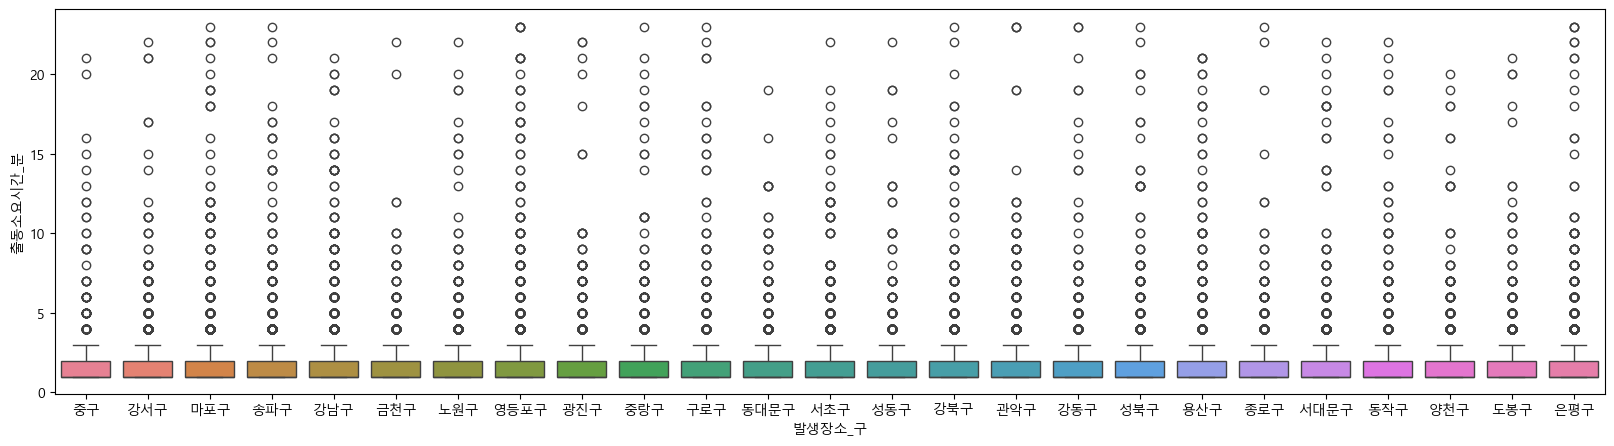

In [171]:
#박스플롯 그리기 
plt.figure(figsize=(20,5)) #가로 20, 세로 5
sns.boxplot(data=df_cleaned, x='발생장소_구', y= '출동소요시간_분', hue='발생장소_구')

* 여전히 이상치는 많지만 각 구마다 데이터들이 고루 분포되어 있기 때문에
* 이 값들이 이상치다, 오류값이다 라고 판단하고 제거하기보다는 눈여겨봐야함.
* 최대 출동소요시간은 20분!

In [172]:
# 구별 평균 출동 소요시간을 pivot table 이용해 계산 
df_cleaned_pivot = df_cleaned.pivot_table(index=['발생장소_구'], values= '출동소요시간_분',aggfunc='mean').reset_index()
df_cleaned_pivot

,발생장소_구,출동소요시간_분
0,강남구,1.73
1,강동구,1.75
2,강북구,1.82
3,강서구,1.73
4,관악구,1.80
5,광진구,1.77
6,구로구,1.74
7,금천구,1.74
8,노원구,1.85
9,도봉구,1.82


* 위 코드는 발생장소_구별로 출동소요시간_분의 평균 값을 계산하고, 
* 그 결과를 정리한 새로운 데이터프레임 df_cleaned_pivot을 생성

<Axes: xlabel='발생장소_구', ylabel='출동소요시간_분'>

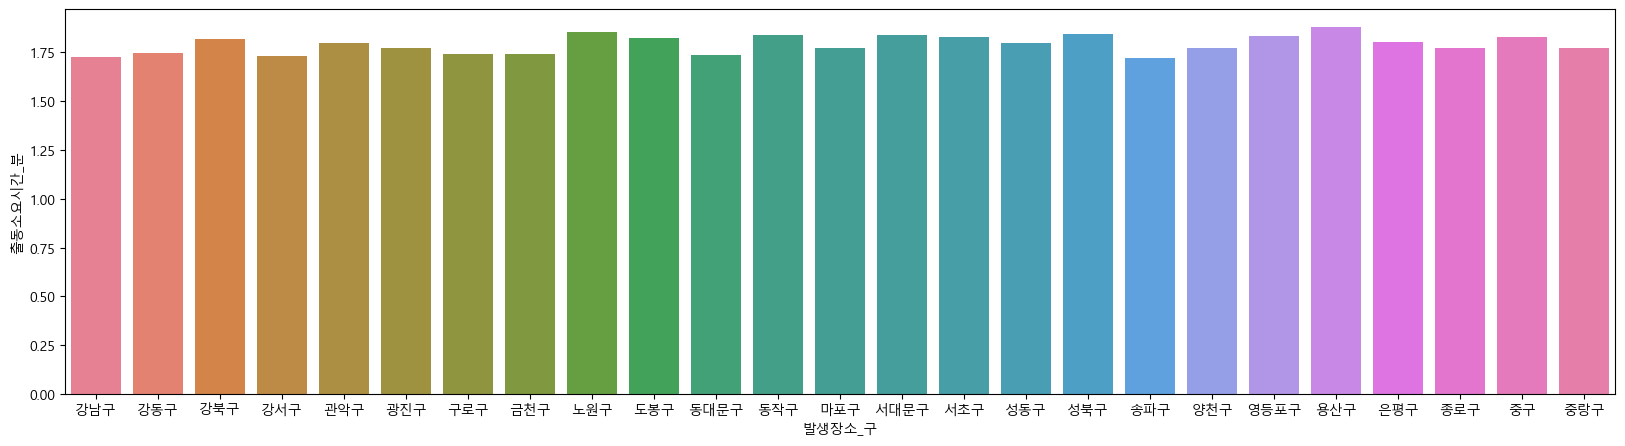

In [176]:
#구별 '출동소요시간_분'의 평균값 시각화
plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned_pivot, x='발생장소_구',y='출동소요시간_분', hue='발생장소_구') #hue='발생장소_구 : 구별 랜덤색상

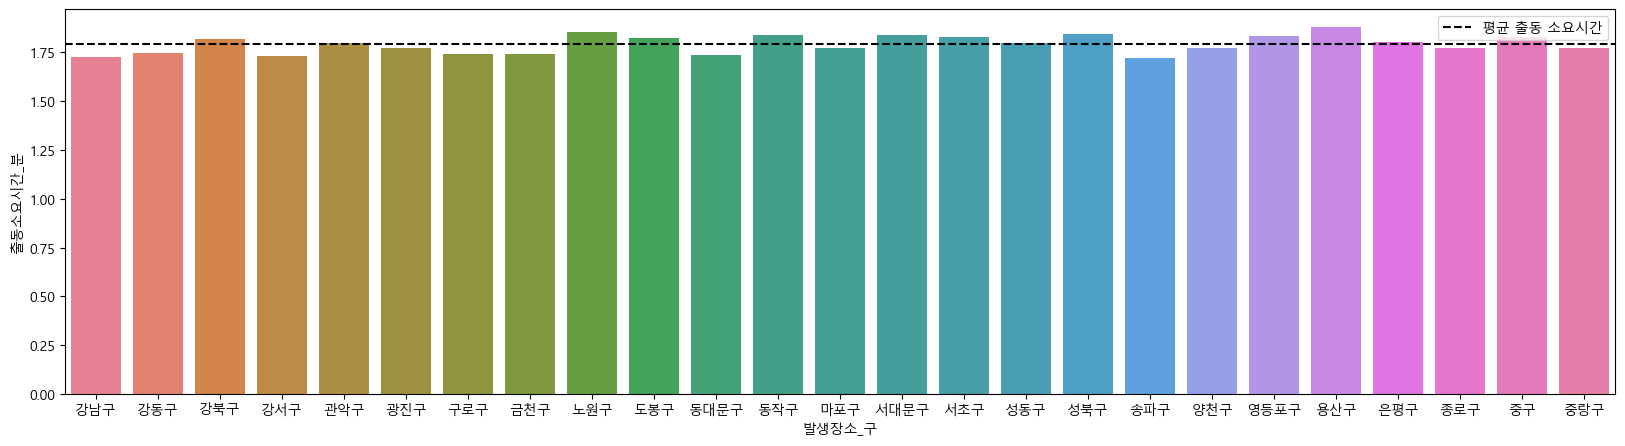

In [178]:
# '출동 소요시간_분'의 평균값 계산
mean_time = df_cleaned_pivot['출동소요시간_분'].mean()

# 그래프 크기 설정
plt.figure(figsize=(20, 5))

# 구별 평균 출동 소요시간 막대 그래프 생성
sns.barplot(data=df_cleaned_pivot, x='발생장소_구', y='출동소요시간_분', hue='발생장소_구')

# 전체 평균 출동 소요시간을 표시하는 수평선 추가
plt.axhline(mean_time, color='black', linestyle='--', label='평균 출동 소요시간')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()
